read posting list

In [2]:
#read binary file
#[len] [data*n] (unsigned int)
import numpy as np
expindex=open('/Users/tianjiaye/ExpIndex','rb')
expindex.seek(0)
len_list=[]
posting_list_container=[]
#read until the end of file
for m in range(8):
    posting_list=[]
    len_a=np.fromfile(expindex,dtype=np.uint32,count=1)
    if len_a.size==0:
        break
    lenth=int(len_a[0])
    len_list.append(lenth)
    print(lenth)
    posting_list=[]
    for i in range(lenth):
        posting_list.append(int(np.fromfile(expindex,dtype=np.uint32,count=1)[0]))
    posting_list_container.append(posting_list)
expindex.close()




21
6371
1813
30000
30000
30000
30000
4834


look for the distribution of length of posting list

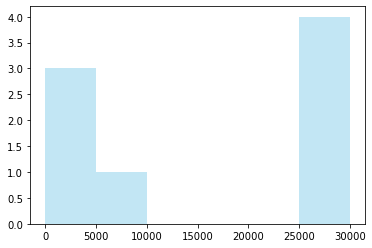

In [3]:
#plot the distribution of the length of the posting list
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
plt.hist(len_list,bins=[0,5000,10000,15000,20000,25000,30000],color='skyblue',alpha=0.5)
plt.savefig('/Users/tianjiaye/ExpIndex_length_distribution.pdf')


the data in first 3 posting list

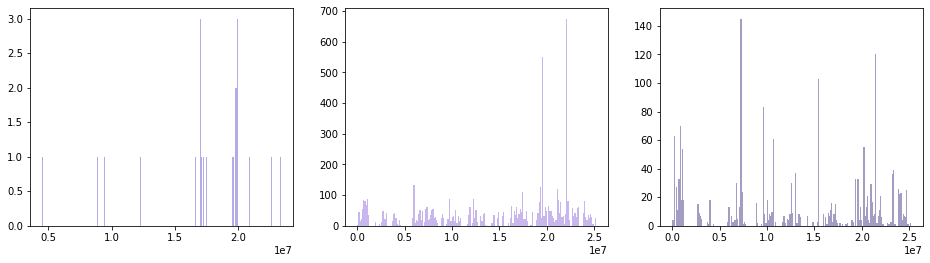

In [4]:
#plot the distribution of the elements in the posting list
fig=plt.figure(figsize=(16,4))
pic1=fig.add_subplot(1,3,1)
plt.hist(posting_list_container[0],bins=200,color='slateblue',alpha=0.5)
pic2=fig.add_subplot(1,3,2)
plt.hist(posting_list_container[1],bins=200,color='mediumpurple',alpha=0.5)
pic3=fig.add_subplot(1,3,3)
plt.hist(posting_list_container[2],bins=200,color='darkslateblue',alpha=0.5)
plt.show()

the data distribution of same-length posting list

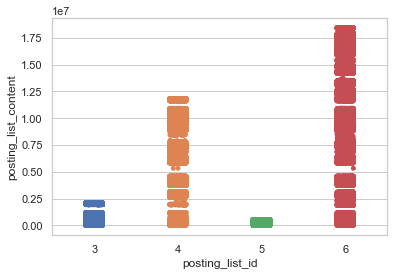

In [9]:
#put the posting list 4-7 into a dataset
import pandas as pd
# as posting_list_id,posting_list_content
posting_list_id=[]
posting_list_content=[]
for i in range(3,7):
    for j in range(len_list[i]):
        posting_list_id.append(i)
        posting_list_content.append(posting_list_container[i][j])
data_list=pd.DataFrame({'posting_list_id':posting_list_id,'posting_list_content':posting_list_content})
data_list.head()
import seaborn as sns
sns.set(style="whitegrid")
ax=sns.stripplot(x='posting_list_id',y='posting_list_content',data=data_list)


In [20]:
print(posting_list_container[5][29999])
print(posting_list_container[6][29999])

541631
18455635
